In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [79]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.15, 0.8, 0.83]

In [80]:
class Bandit:
  def __init__(self, p):
    self.p = p
    self.p_estimate = 0.
    self.N = 0.
  
  def pull(self):
    # Pulling the bandit for once
    return np.random.random() < self.p
  
  def update(self, x):
    self.p_estimate = ((self.p_estimate * self.N) + x) / (self.N + 1)
    self.N += 1

In [81]:
def ucb(mean, n, nj):
  return mean + np.sqrt((2*np.log(n)) / nj)

In [82]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)
  total_played_times = 0

  # initialization -> play each bandit once
  for j in range(len(bandits)):
    x = bandits[j].pull()
    total_played_times += 1
    bandits[j].update(x)

  # Play NUM_TRIALS time
  for i in range(NUM_TRIALS):
    j = np.argmax([ucb(b.p_estimate, total_played_times, b.N) for b in bandits])
    x = bandits[j].pull()
    total_played_times += 1
    bandits[j].update(x)

    # Update the rewards list
    rewards[i] = x
  
  cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.xscale('log')
  plt.show()

  # plot moving average ctr linear
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

  for b in bandits:
    print(b.p_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

 


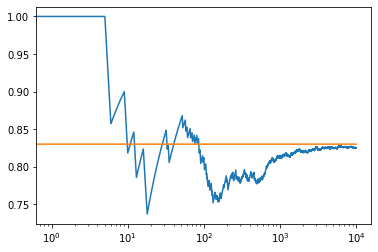

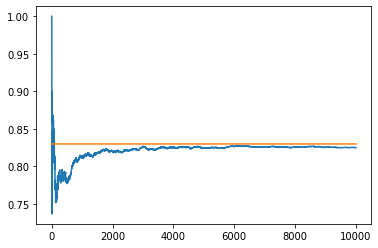

0.14705882352941177
0.800632911392406
0.8363123236124177
total reward earned: 8250.0
overall win rate: 0.825
num times selected each bandit: [34.0, 2528.0, 7441.0]


In [83]:
experiment()